In [104]:
#Imported required libraries
import os
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

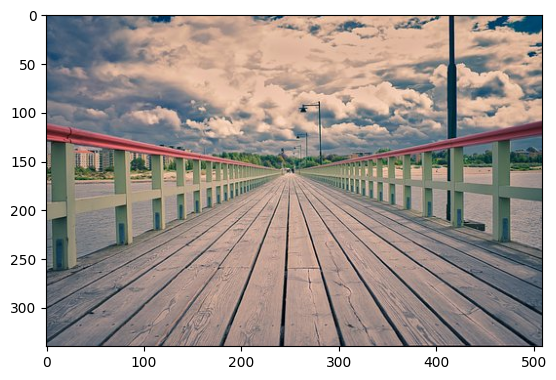

In [105]:
#Imported image 1
image = cv2.imread("/content/vanishing-point-4468780__340.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [106]:
# Threshold by which lines will be rejected wrt the horizontal
REJECT_DEGREE_TH = 4.0

def FilterLines(Lines):
    FinalLines = []

    for Line in Lines:
        [[x1, y1, x2, y2]] = Line

        # Calculate slope and intercept
        if x1 != x2:
            m = (y2 - y1) / (x2 - x1)
        else:
            m = 100000000  # Vertical line approximation
        c = y2 - m * x2

        # Calculate the angle of the line
        theta = math.degrees(math.atan(m))

        # Filter lines based on angle
        if REJECT_DEGREE_TH <= abs(theta) <= (90 - REJECT_DEGREE_TH):
            l = math.sqrt((y2 - y1) ** 2 + (x2 - x1) ** 2)  # Length of the line
            FinalLines.append([x1, y1, x2, y2, m, c, l])

    # Retain only the longest 8 lines
    if len(FinalLines) > 8:
        FinalLines = sorted(FinalLines, key=lambda x: x[-1], reverse=True)[:8]

    return FinalLines

In [107]:
def GetLines(image):
    GrayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # Convert the input image to grayscale
    BlurGrayImage = cv2.GaussianBlur(GrayImage, (5, 5), 1) # Apply Gaussian blur to reduce noise and smooth the image
    EdgeImage = cv2.Canny(BlurGrayImage, 40, 255) # Use the Canny edge detector to find edges in the image

    Lines = cv2.HoughLinesP(EdgeImage, 1, np.pi / 180, 50, minLineLength=10, maxLineGap=15) # Apply the Hough Line Transform to detect lines in the edge image

    if Lines is None:
        print("Not enough lines found in the image for Vanishing Point detection.")
        exit()

    return FilterLines(Lines)

In [108]:
def GetVanishingPoint(Lines):
    # Initialize the vanishing point and minimum error
    VanishingPoint = None
    MinError = float('inf')

    # Iterate through all pairs of lines
    for i in range(len(Lines)):
        for j in range(i + 1, len(Lines)):
            m1, c1 = Lines[i][4], Lines[i][5]
            m2, c2 = Lines[j][4], Lines[j][5]

            if m1 != m2:
                x0 = (c1 - c2) / (m2 - m1)
                y0 = m1 * x0 + c1

                err = 0
                for k in range(len(Lines)):
                    m, c = Lines[k][4], Lines[k][5]
                    m_ = (-1 / m)
                    c_ = y0 - m_ * x0

                    x_ = (c - c_) / (m_ - m)
                    y_ = m_ * x_ + c_

                    l = math.sqrt((y_ - y0) ** 2 + (x_ - x0) ** 2)

                    err += l ** 2

                err = math.sqrt(err)

                if MinError > err:
                    MinError = err
                    VanishingPoint = [x0, y0]

    return VanishingPoint

# Image 1

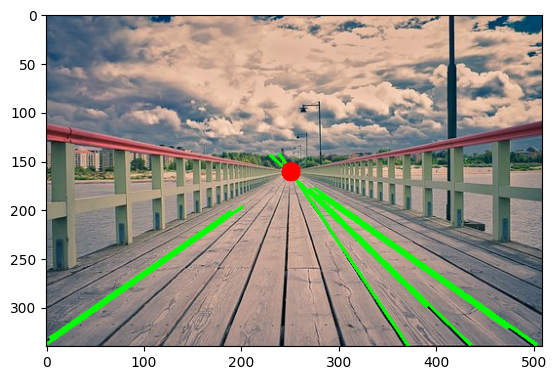

In [109]:
Lines = GetLines(image)

VanishingPoint = GetVanishingPoint(Lines)

if VanishingPoint is None:
        print("Vanishing Point not found. Not enough valid lines in the image.")
        exit()

# Draw lines and the vanishing point
for Line in Lines:
  cv2.line(image, (Line[0], Line[1]), (Line[2], Line[3]), (0, 255, 0), 2)
cv2.circle(image, (int(VanishingPoint[0]), int(VanishingPoint[1])), 10, (255, 0, 0), -1)

plt.imshow(image)

# Image 2

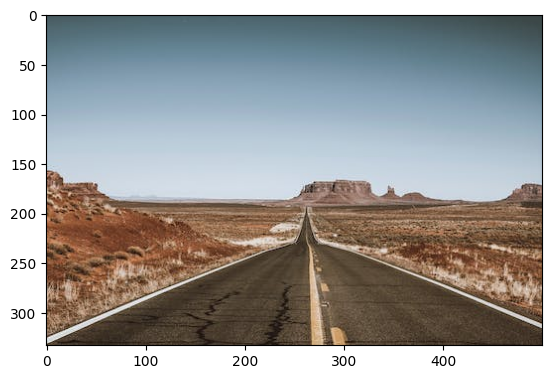

In [110]:
#Imported image 2
image2 = cv2.imread("/content/pexels-photo-10622719.jpeg")
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
plt.imshow(image2)
plt.show()

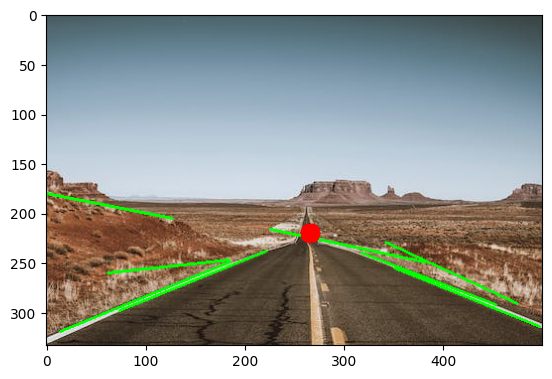

In [111]:
# Used GetLines and VanishingPoint functions on the image2
Lines = GetLines(image2)
VanishingPoint = GetVanishingPoint(Lines)

if VanishingPoint is None:
        print("Vanishing Point not found. Not enough valid lines in the image.")
        exit()

# Draw lines and the vanishing point
for Line in Lines:
  cv2.line(image2, (Line[0], Line[1]), (Line[2], Line[3]), (0, 255, 0), 2)
cv2.circle(image2, (int(VanishingPoint[0]), int(VanishingPoint[1])), 10, (255, 0, 0), -1)

plt.imshow(image2)

# Image 3

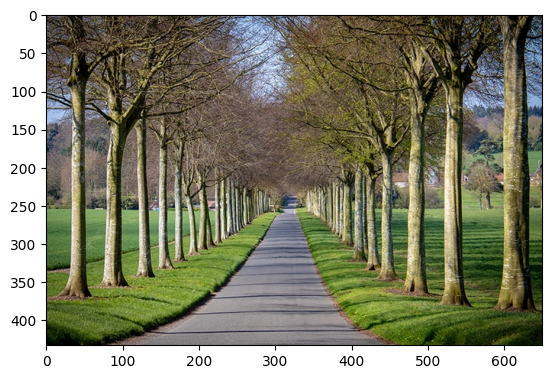

In [112]:
#Imported image 3
image3 = cv2.imread("/content/1603176284-vanishingpoint.jpg")
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)
plt.imshow(image3)
plt.show()

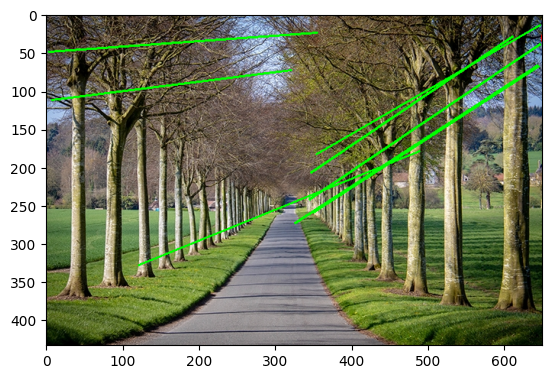

In [113]:
# Used GetLines and VanishingPoint functions on the image3
Lines = GetLines(image3)
VanishingPoint = GetVanishingPoint(Lines)

if VanishingPoint is None:
        print("Vanishing Point not found. Not enough valid lines in the image.")
        exit()

# Draw lines and the vanishing point
for Line in Lines:
  cv2.line(image3, (Line[0], Line[1]), (Line[2], Line[3]), (0, 255, 0), 2)
cv2.circle(image3, (int(VanishingPoint[0]), int(VanishingPoint[1])), 10, (255, 0, 0), -1)

plt.imshow(image3)

# Image 4

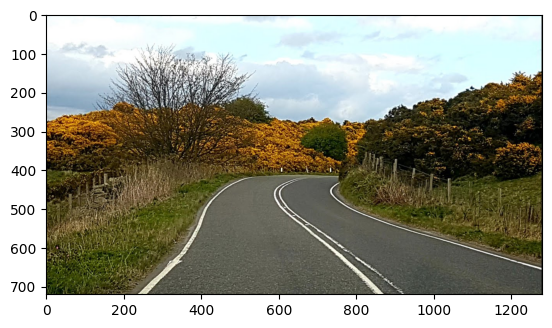

In [114]:
#Imported image 4
image4 = cv2.imread("/content/maxresdefault.jpg")
image4 = cv2.cvtColor(image4, cv2.COLOR_BGR2RGB)
plt.imshow(image4)
plt.show()

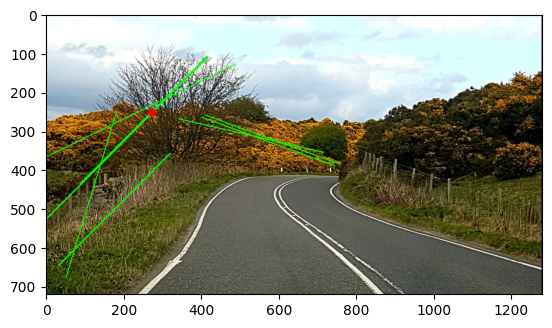

In [115]:
# Used GetLines and VanishingPoint functions on the image4
Lines = GetLines(image4)
VanishingPoint = GetVanishingPoint(Lines)

if VanishingPoint is None:
        print("Vanishing Point not found. Not enough valid lines in the image.")
        exit()

# Draw lines and the vanishing point
for Line in Lines:
  cv2.line(image4, (Line[0], Line[1]), (Line[2], Line[3]), (0, 255, 0), 2)
cv2.circle(image4, (int(VanishingPoint[0]), int(VanishingPoint[1])), 10, (255, 0, 0), -1)

plt.imshow(image4)